In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import warnings
warnings.filterwarnings(action="ignore")

In [30]:
fontpath = '/usr/share/fonts/NanumGothic.ttf'

fname = mpl.font_manager.FontProperties(fname=fontpath).get_name()

In [31]:
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.unicode_minus'] = False

In [32]:
# figure : matplotlib에서 축, 그래프, 레이블등 모든 객체를 아우르는 하나의 그릇을 의미(container)
# 그래프를 세밀하게 다루고 싶다면 figure객체를 이용
fig = plt.figure()
fig  

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

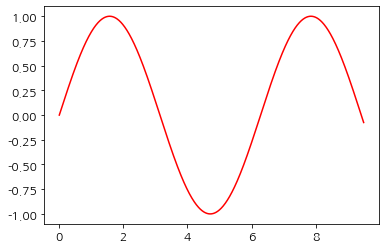

In [7]:
# 간단한 sin 그래프
x = np.linspace(0, 9.5, 1000)

fig = plt.figure()
ax = plt.axes()  # 그래프 축 영역
ax.plot(x, np.sin(x), 'r')

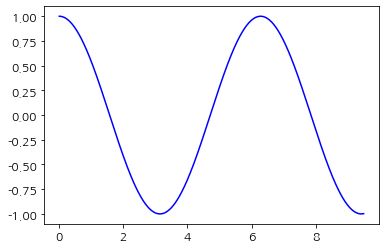

In [8]:
# 간단한 cos 그래프
y = np.linspace(0, 9.5, 1000)

fig = plt.figure()
ax = plt.axes()
ax.plot(y, np.cos(y), 'b')

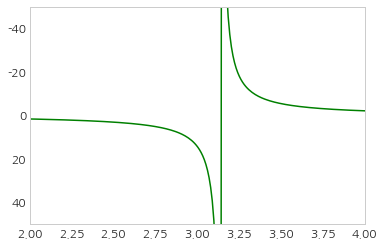

In [42]:
# 간단한 tan 그래프
z = np.linspace(0, 9.5, 1000)

fig = plt.figure()
ax = plt.axes()
ax.plot(z, np.tan(z/2), 'g')
ax.set_xlim(2,4)
ax.set_ylim(50,-50)
ax.grid()

In [44]:
# # sin, cos, tan 한번에 그리기
# fig = plt.figure()
# ax = plt.axes()
# ax.plot(x,np.sin(x), 'r', label='사인')
# ax.plot(y, np.cos(y), 'b', label='코사인')
# ax.plot(z, np.tan(x/2), 'g', label='탄젠트')
# ax.set(xlim=(0, 9.5), ylim=(-1.1, 1.1), title='sin/cos/tan 그래프', xlabel='x값', ylabel='y값')
# ax.legend()
# ax.grid()

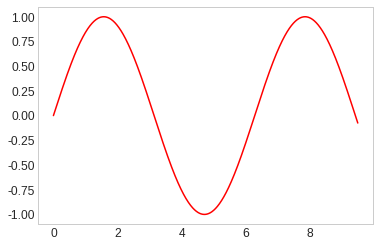

In [11]:
# 그래프 스타일 지정
# plt.style.use('테마명')
# matplotlib.org

fig = plt.figure()
# plt.style.use('classic') # 고전
plt.style.use('seaborn-whitegrid') # seaborn 세련
# plt.style.use('ggplot') # ggplot
# plt.style.use('bmh')  # 해커스타일
# plt.style.use('dark_background')  # 프리젠테이션

ax = plt.axes()
ax.plot(x, np.sin(x), 'r')
ax.grid()

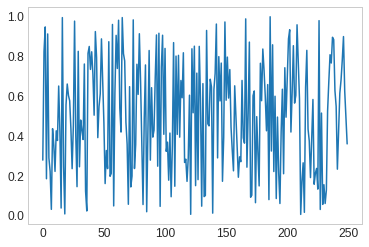

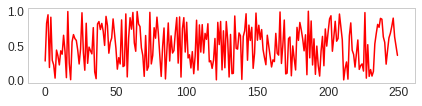

In [12]:
# 그래프 크기 설정 : figure
# 기본단위 : 6.4 x 4.8 인치
# 픽셀크기 = 인치 * dpi

np.random.seed(2111021400)
data = np.random.rand(250)
plt.plot(data)
plt.grid()


# 500x100 픽셀 크기 그래프
fig = plt.figure()
width = 500 / fig.dpi
height =  100 / fig.dpi
fig.set_figwidth(width)
fig.set_figheight(height)

ax = plt.axes()
ax.plot(data, 'r')
ax.grid()

In [13]:
# 그래프 객체의 실제 픽셀 알아내기 : gcf
f = plt.gcf()
print(f, id(f))  # 그래프 크기, 그래프 번호

Figure(432x288) 140371323645328


<Figure size 432x288 with 0 Axes>

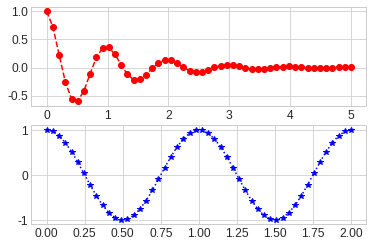

In [14]:
# 여러개의 그래프 나타내기 : subplot
# subplot(행수/ 열수/ 번호)

x1 = np.linspace(0, 5)
x2 = np.linspace(0, 2)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

# 2x1 그래프 
fig = plt.figure()
ax1 = plt.subplot(211)
plt.plot(x1,y1, 'ro--')


ax2 = plt.subplot(212)
plt.plot(x2,y2, 'b*:')

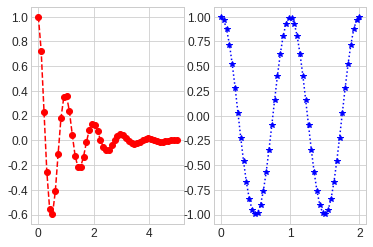

In [15]:
# 1x2 그래프
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(x1, y1, 'ro--')

ax2 = plt.subplot(122)
plt.plot(x2, y2, 'b*:')

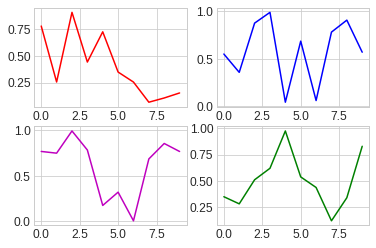

In [16]:
# 2x2 그래프
plt.subplot(221) # 1,1
plt.plot(np.random.rand(10), 'r')

plt.subplot(222) # 1,2
plt.plot(np.random.rand(10), 'b')

plt.subplot(223) # 2,1
plt.plot(np.random.rand(10), 'm')

plt.subplot(224) # 2,2
plt.plot(np.random.rand(10), 'g')

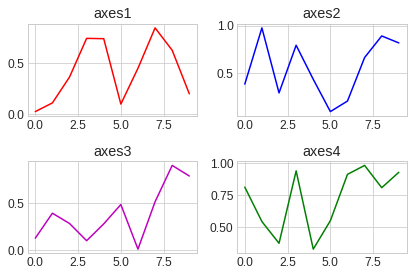

In [17]:
# 2x2 그래프 2
fig, axes = plt.subplots(2,2)
axes[0,0].plot(np.random.rand(10), 'r')
axes[0,1].plot(np.random.rand(10), 'b')
axes[1,0].plot(np.random.rand(10), 'm')
axes[1,1].plot(np.random.rand(10), 'g')

axes[0,0].set_title('axes1')
axes[0,1].set_title('axes2')
axes[1,0].set_title('axes3')
axes[1,1].set_title('axes4')


plt.tight_layout() # 여러개의 그래프를 그리는 경우, 보기좋게 출력해 줌 

In [33]:
# 부산 -> 서울, 경기, 인천 인구 이동 시각화
popmove = pd.read_excel('csv/시도별 전출입 인구수.xlsx', header=0)

popmove = popmove.fillna(method='ffill')

In [34]:
# 부산 -> 서울 
search = (popmove.전출지별 == '부산광역시')&(popmove.전입지별 == '서울특별시')
psmove = popmove[search]
psmove

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
38,부산광역시,서울특별시,24263.0,30144.0,18260.0,24251.0,30284.0,59914.0,43416.0,42685.0,...,25249.0,24459.0,23116.0,23016.0,21437.0,19621.0,20616.0,19441.0,19236.0,19460.0


In [35]:
# 부산 -> 경기
search = (popmove.전출지별 == '부산광역시')&(popmove.전입지별 == '경기도')
pkmove = popmove[search]

pkmove

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
46,부산광역시,경기도,6350.0,6543.0,4788.0,7364.0,6589.0,15314.0,10705.0,11070.0,...,19062.0,18810.0,19961.0,20127.0,17454.0,15931.0,16623.0,16441.0,16401.0,15837.0


In [36]:
# 부산 -> 인천
search = (popmove.전출지별 == '부산광역시')&(popmove.전입지별 == '인천광역시')
pimove = popmove[search]

pimove

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
41,부산광역시,인천광역시,-,-,-,-,-,-,-,-,...,3544.0,3236.0,3230.0,3741.0,3180.0,2986.0,3143.0,3185.0,3092.0,2994.0


In [37]:
# 변수 생성
x = np.arange(2000, 2017+1)
y1 = psmove.iloc[:, 32:].iloc[0]
y2 = pkmove.iloc[:, 32:].iloc[0]
y3 = pimove.iloc[:, 32:].iloc[0]


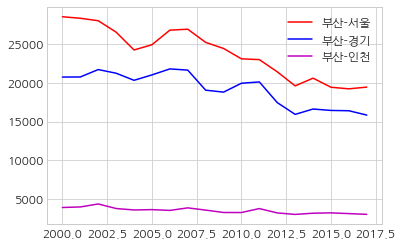

In [38]:
# 그래프로 시각화
plt.plot(x,y1, 'r', label='부산-서울')
plt.plot(x,y2, 'b', label='부산-경기')
plt.plot(x,y3, 'm', label='부산-인천')
plt.legend()


[Text(0, 0.0, '0'),
 Text(0, 5000.0, '5,000'),
 Text(0, 10000.0, '10,000'),
 Text(0, 15000.0, '15,000'),
 Text(0, 20000.0, '20,000'),
 Text(0, 25000.0, '25,000'),
 Text(0, 30000.0, '30,000')]

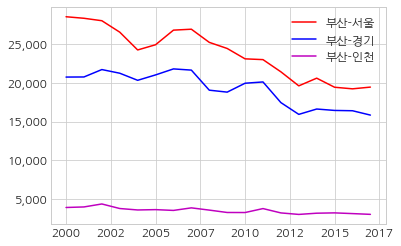

In [39]:
# 그래프로 시각화 2
fig = plt.figure()
ax = plt.axes()
plt.plot(x, y1, 'r', label='부산-서울')
plt.plot(x, y2, 'b', label='부산-경기')
plt.plot(x, y3, 'm', label='부산-인천')
ax.legend()

# x축 눈금을 리스트로 변환 후 포멧문자열로 변환
ax.set_xticklabels(['{:}'.format(int(x)) for x in ax.get_xticks().tolist()])
# y축 눈금을 리스트로 변환 후 포멧문자열로 변환
ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks().tolist()])


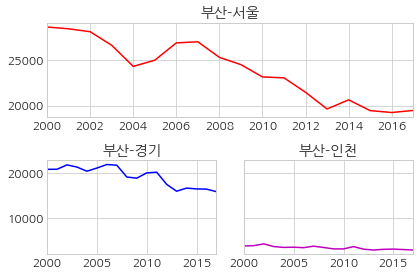

In [40]:
# 그래프 시각화 3
plt.subplot(2,1,1)
plt.plot(x, y1, 'r')
plt.title('부산-서울')
plt.xlim([2000, 2017])

ax2 = plt.subplot(2,2,3)
plt.plot(x, y2, 'b')
plt.title('부산-경기')
plt.xlim([2000, 2017])

plt.subplot(2,2,4, sharey=ax2)  # 이전 그래프의 y축을 공유
plt.plot(x, y3, 'm')
plt.title('부산-인천')
plt.xlim([2000, 2017])
plt.yticks(visible = False)  # 눈금표시 안함

plt.tight_layout()
plt.show()